<H1>MADATORY PYTHON LIBRARIES</H1>

In [220]:
import xarray
import pandas as pd
import folium
import os
import numpy as np
from folium import plugins
import matplotlib.pyplot as plt
%matplotlib  inline

<h1>IN SITU VESSELS</h1>

In Situ 'vessels' comprehends a wide range of data sources on board of vessels like Thermosalinometers, CTDs, MiniLoggers, Ferriboxes, XBTs, Bottles, BATHY and TESAC. Depending on the device, vessels provides data time series of certain parameters along its trajectory either for the upper water surface (time series) or along the water column (profiles). It's platform data types are TS, CT, ML, FB, XB, BO, BA and TE:

In [195]:
data = { 'PR (profile)': [' -', ' ✔',' ✔ ', ' ✔',' ✔', '  ✔',' ✔', ' ✔'], 'TS (time serie)': [' ✔', ' -',' - ', ' - ',' - ', ' -', '- ', ' -']}
pd.DataFrame(data=data, index=['TS (thermosalinomter)', 'CT (CTDs)', 'ML (Miniloggers)', 'FB (Ferribox)', 'XB (XBTs)', 'BO (Bottles)', 'BA (BATHY)', 'TE (TESAC)'])

PR (profile) TS (time serie)
TS (thermosalinomter)            -               ✔
CT (CTDs)                        ✔               -
ML (Miniloggers)                ✔               - 
FB (Ferribox)                    ✔              - 
XB (XBTs)                        ✔              - 
BO (Bottles)                     ✔               -
BA (BATHY)                       ✔              - 
TE (TESAC)                       ✔               -

## 1. In Situ netCDF

Imagine you have downloaded some <i>_TS_ (time serie)</i> dataset from In Situ vessels (see how to download files froma  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTAC-Tarining-Phase2/blob/master/PythonNotebook/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTAC-Tarining-Phase2/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_type.ipynb)) like: [GL_TS_TS_FNAV_2002.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/vessel/GL_TS_TS_FNAV_2002.nc)

In [196]:
dataset = 'GL_TS_TS_FNAV_2002.nc'

Let's have a look to its content:

In [197]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/GL_TS_TS_FNAV_2002.nc


In [198]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [199]:
ds

<xarray.Dataset>
Dimensions:                 (DEPTH: 1, LATITUDE: 32764, LONGITUDE: 32764, POSITION: 32764, TIME: 32764)
Coordinates:
  * TIME                    (TIME) datetime64[ns] 2002-04-13T04:59:59.971200 ...
  * LATITUDE                (LATITUDE) float64 53.98 53.97 53.97 53.97 53.95 ...
  * LONGITUDE               (LONGITUDE) float64 7.47 7.42 7.38 7.35 7.32 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC                 (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    POSITION_QC             (POSITION) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    POSITIONING_SYSTEM      (POSITION) object nan nan nan nan nan nan nan ...
    DC_REFERENCE            (TIME) object '897355789                       ' ...
    DEPH                    (TIME, DEPTH) float64 5.0 5.0 5.0 5.0 5.0 5.0 ...
    DEPH_QC                 (TIME, DEPTH) float64 7.0 7.0 7.0 7.0 7.0 7.0 ...
    DEPH_DM                 (TIME, DEPTH) object nan nan nan nan nan nan nan ...
    PSAL 

In [200]:
ds.variables.keys()

[u'TIME',
 u'TIME_QC',
 u'LATITUDE',
 u'LONGITUDE',
 u'POSITION_QC',
 u'POSITIONING_SYSTEM',
 u'DC_REFERENCE',
 u'DEPH',
 u'DEPH_QC',
 u'DEPH_DM',
 u'PSAL',
 u'PSAL_QC',
 u'PSAL_DM',
 u'PSAL_ADJUSTED_ERROR',
 u'PSAL_ADJUSTED_ERROR_DM',
 u'PSAL_ADJUSTED',
 u'PSAL_ADJUSTED_QC',
 u'PSAL_ADJUSTED_DM',
 u'SSJT',
 u'SSJT_QC',
 u'SSJT_DM']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [201]:
ds['LATITUDE']

<xarray.DataArray 'LATITUDE' (LATITUDE: 32764)>
array([ 53.98    ,  53.970001,  53.970001, ...,  49.5     ,  49.5     ,  49.5     ])
Coordinates:
  * LATITUDE  (LATITUDE) float64 53.98 53.97 53.97 53.97 53.95 53.95 53.95 ...
Attributes:
    long_name:      Latitude of each location
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    QC_indicator:   1
    QC_procedure:   1
    uncertainty:     
    comment:         
    axis:           Y

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [202]:
ds['POSITION_QC']

<xarray.DataArray 'POSITION_QC' (POSITION: 32764)>
array([ 1.,  1.,  1., ...,  1.,  1.,  1.])
Dimensions without coordinates: POSITION
Attributes:
    long_name:      quality flag
    conventions:    OceanSITES reference table 2
    valid_min:      0
    valid_max:      9
    flag_values:    [0 1 2 3 4 5 6 7 8 9]
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data: 

In [203]:
pd.DataFrame(data=ds['POSITION_QC'].attrs['flag_values'], index = ds['POSITION_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

quality flag
no_qc_performed                                       0
good_data                                             1
probably_good_data                                    2
bad_data_that_are_potentially_correctable             3
bad_data                                              4
value_changed                                         5
not_used                                              6
nominal_value                                         7
interpolated_value                                    8
missing_value                                         9

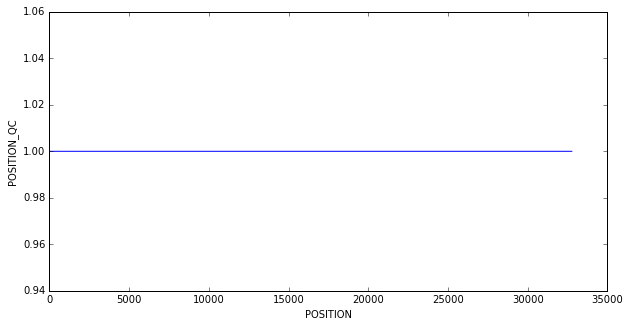

In [204]:
ds['POSITION_QC'].plot(aspect=2, size=5)

In this case, all positions are considered 'good' so we skip any further data selection to overlook not-good data.

## 2. Animating a vessel trajectory with folium

### a) First glimpse

In [205]:
lats = ds['LATITUDE'].values.tolist()
lons = ds['LONGITUDE'].values.tolist()
times = ds['TIME'].values.tolist()

In [206]:
mean_lat = np.mean(lats)
mean_lon = np.mean(lons)

In [207]:
vessel = {
    'type': 'Feature',
    'geometry': {
        'type': 'LineString',
        'coordinates': []
    },
    'properties': {
        'times': [],
        'variable': []
    }
}

In [208]:
for time, lat, lon in zip(times, lats, lons) :
    unix_timestamp = int(str(time)[:13])
    vessel['properties']['times'].append(unix_timestamp)
    vessel['geometry']['coordinates'].append([lon,lat])

In [209]:
view = folium.Map(location=[mean_lat, mean_lon], zoom_start=3)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': [vessel],
}, period='PT1H', add_last_point=True, loop=False).add_to(view)
view

From above whe see se veral deployments of the same platform (vessel).

### b) Finding deployments

Let's find first the different deployments. What will help to split the platform file in deployments?  Time 'jumps' (pause among deployments) will point out the end and beginning of a deployment. This way we first will try to find these so called 'jumps':

In [213]:
unix_time = []
for item in ds['TIME'].values.tolist():
    unix_time.append(int(str(item)[:10]))

<Container object of 32763 artists>

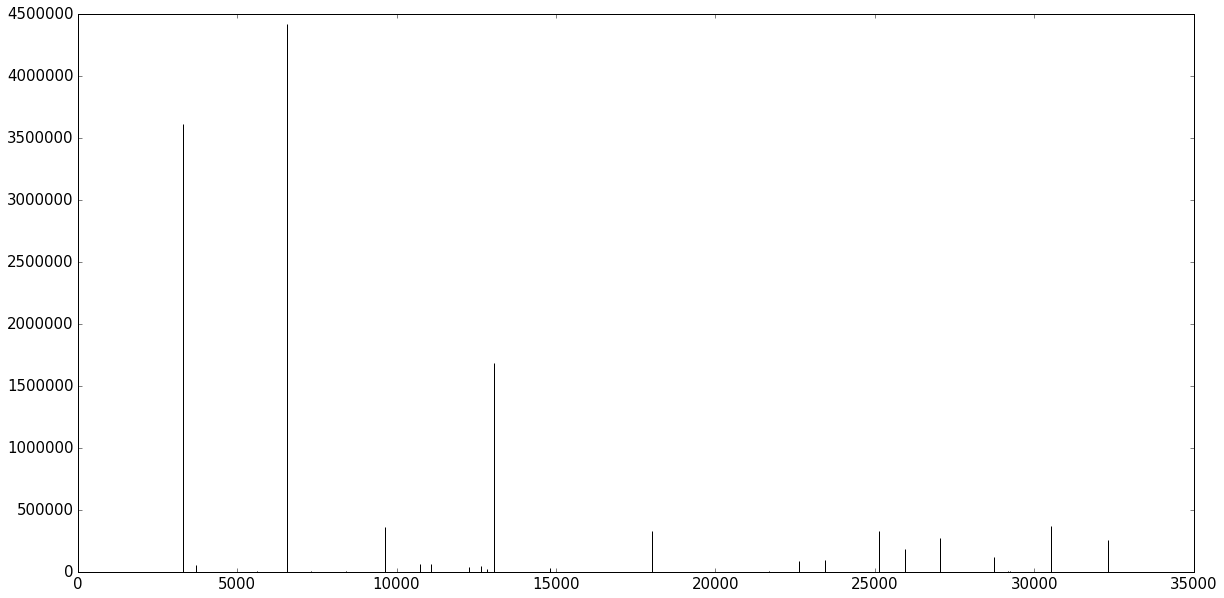

In [249]:
plt.rcParams.update({'font.size': 15})
y = np.diff(unix_time).tolist()
N = len(y)
x = range(N)
width = 1/1.5
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x, y, width)

In [241]:
np.mean(np.diff(unix_time[0:2000]).tolist())#regular transimission cadence

300.78039019509754

In [243]:
deployments_break = []
diff = np.diff(unix_time).tolist()
for n in range(0, len(unix_time)-1):
    if diff[n] > 24*np.mean(np.diff(unix_time[0:2000]).tolist()): #regular transimission cadence: #diff more than 24 hours
        deployments_break.append(n)
print('There has been at least %s deployments of this same platform (vessel)'%(len(deployments_break)+1))

There has been at least 21 deployments of this same platform (vessel)


Let's find the start and end times of the above deployments:

In [244]:
range_limits = []
for n in range(0, len(deployments_break)+1):
    if n == 0:
        range_limits.append([0, deployments_break[n]+1])
    elif n == len(deployments_break):
        range_limits.append([deployments_break[n-1]+1, len(lats)-1])
    else:
        range_limits.append([deployments_break[n-1]+1, deployments_break[n]+1])

In [245]:
for item in range_limits:
    print('from %s to %s'%(datetime.datetime.fromtimestamp(unix_time[item[0]]).strftime('%Y-%m-%d'),datetime.datetime.fromtimestamp(unix_time[item[1]-1]).strftime('%Y-%m-%d')))

from 2002-04-13 to 2002-04-24
from 2002-06-05 to 2002-06-07
from 2002-06-07 to 2002-06-17
from 2002-08-07 to 2002-08-18
from 2002-08-22 to 2002-08-26
from 2002-08-27 to 2002-08-28
from 2002-08-29 to 2002-09-02
from 2002-09-03 to 2002-09-04
from 2002-09-04 to 2002-09-05
from 2002-09-05 to 2002-09-06
from 2002-09-26 to 2002-10-02
from 2002-10-02 to 2002-10-13
from 2002-10-17 to 2002-11-03
from 2002-11-04 to 2002-11-07
from 2002-11-08 to 2002-11-14
from 2002-11-18 to 2002-11-21
from 2002-11-23 to 2002-11-27
from 2002-11-30 to 2002-12-06
from 2002-12-08 to 2002-12-14
from 2002-12-18 to 2002-12-25
from 2002-12-28 to 2002-12-29


In [247]:
deployments = []
for item in range_limits:
    deployment = {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': []
        },
        'properties': {
            'times': [],
            'variable': []
        }
    }
    for n in range(item[0],item[1]):
        unix_timestamp = int(str(times[n])[:13])
        deployment['properties']['times'].append(unix_timestamp)
        deployment['geometry']['coordinates'].append([lons[n],lats[n]])
    deployments.append(deployment)

In [248]:
view = folium.Map(location=[mean_lat, mean_lon], zoom_start=3)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': deployments,
}, period='PT1H', add_last_point=True, loop=False).add_to(view)
view